In [41]:
from scipy.io.arff import loadarff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

In [42]:
raw_data = loadarff("JM1.arff")
data = pd.DataFrame(raw_data[0])
data["label"] = data["label"].apply(lambda x: x.decode())
data["label"] = data["label"].apply(lambda x: 1 if x == 'N' else 0)
data

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,label
0,1.0,7.0,0.0,0.0,4.0,3.0,1.0,11.0,25.05,11.20,3142.03,0.09,59.0,0.09,174.56,280.54,28.0,31.0,15.0,12.0,14.0,1
1,5.0,37.0,0.0,6.0,19.0,16.0,10.0,85.0,81.19,27.41,60987.96,0.74,351.0,0.04,3388.22,2225.29,147.0,204.0,59.0,22.0,98.0,1
2,2.0,1.0,0.0,0.0,1.0,1.0,1.0,10.0,56.44,2.83,453.08,0.05,37.0,0.35,25.17,159.91,17.0,20.0,15.0,5.0,14.0,0
3,16.0,1.0,0.0,0.0,1.0,1.0,1.0,52.0,168.57,16.97,48553.53,0.95,450.0,0.06,2697.42,2860.90,198.0,252.0,70.0,12.0,70.0,0
4,0.0,7.0,0.0,0.0,4.0,2.0,3.0,9.0,14.32,7.71,852.01,0.04,26.0,0.13,47.33,110.45,9.0,17.0,7.0,12.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,4.0,3.0,0.0,3.0,2.0,2.0,1.0,13.0,19.18,15.68,4717.53,0.10,64.0,0.06,262.08,300.83,23.0,41.0,11.0,15.0,22.0,1
7778,2.0,9.0,0.0,0.0,5.0,2.0,3.0,11.0,17.01,11.70,2328.73,0.07,44.0,0.09,129.37,199.04,18.0,26.0,10.0,13.0,15.0,1
7779,18.0,105.0,0.0,18.0,53.0,22.0,53.0,84.0,51.30,56.76,165253.09,0.97,489.0,0.02,9180.73,2911.60,168.0,321.0,37.0,25.0,123.0,0
7780,1.0,5.0,0.0,0.0,3.0,3.0,1.0,15.0,29.25,6.25,1142.73,0.06,41.0,0.16,63.48,182.84,15.0,26.0,12.0,10.0,18.0,1


[]

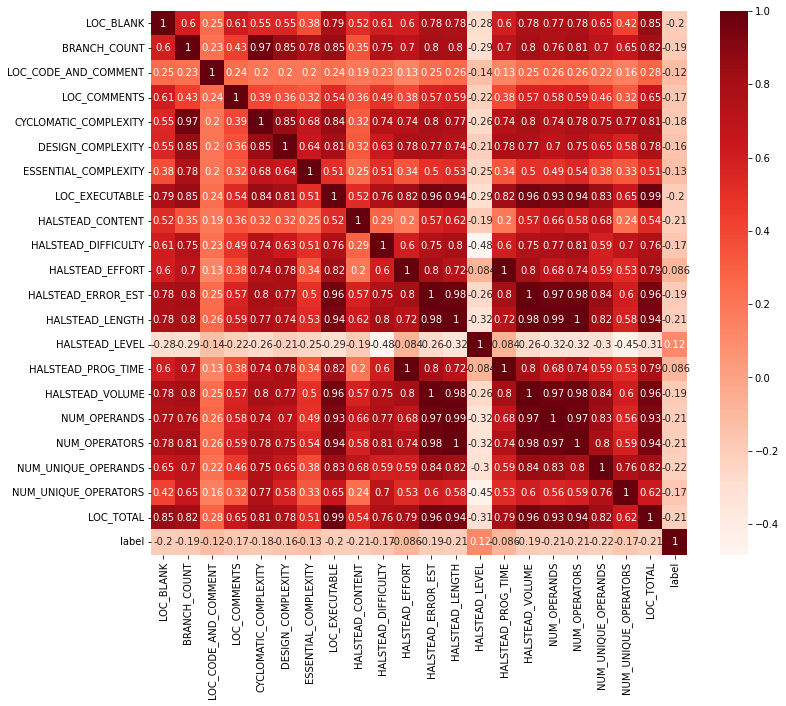

In [43]:
correlationMatrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.cm.Reds)
plt.plot()

##ESF

In [44]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=89)
knn.fit(X_train, y_train)
accuracy=knn.score(X_test, y_test)
print("Accuracy ESf KNN:",accuracy)
y_pred=knn.predict(X_test)
print("MCC ESf KNN:",matthews_corrcoef(y_pred,y_test))
print()

gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy=gnb.score(X_test, y_test)
print("Accuracy ESf NB:",accuracy)
y_pred=gnb.predict(X_test)
print("MCC ESf NB:",matthews_corrcoef(y_pred,y_test))
print()

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
accuracy=dtc.score(X_test, y_test)
print("Accuracy ESf NB:",accuracy)
y_pred=dtc.predict(X_test)
print("MCC ESf DT:",matthews_corrcoef(y_pred,y_test))
print()

ab= AdaBoostClassifier()
ab.fit(X_train, y_train)
accuracy=ab.score(X_test, y_test)
print("Accuracy ESf AB:",accuracy)
y_pred=ab.predict(X_test)
print("MCC ESf AB:",matthews_corrcoef(y_pred,y_test))
print()

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy=rf.score(X_test, y_test)
print("Accuracy ESf RF:",accuracy)
y_pred=rf.predict(X_test)
print("MCC ESf RF:",matthews_corrcoef(y_pred,y_test))
print()

Accuracy ESf KNN: 0.785438972162741
MCC ESf KNN: 0.03492337563715225

Accuracy ESf NB: 0.7892933618843683
MCC ESf NB: 0.19236047777437038

Accuracy ESf NB: 0.6955032119914347
MCC ESf DT: 0.11530738692497787

Accuracy ESf AB: 0.7910064239828694
MCC ESf AB: 0.17079969424678831

Accuracy ESf RF: 0.7965738758029979
MCC ESf RF: 0.24501768778523408



In [45]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop
data = data.drop(to_drop, axis=1)
data

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_LEVEL,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,label
0,1.0,7.0,0.0,0.0,3.0,1.0,11.0,25.05,11.20,3142.03,0.09,15.0,12.0,1
1,5.0,37.0,0.0,6.0,16.0,10.0,85.0,81.19,27.41,60987.96,0.04,59.0,22.0,1
2,2.0,1.0,0.0,0.0,1.0,1.0,10.0,56.44,2.83,453.08,0.35,15.0,5.0,0
3,16.0,1.0,0.0,0.0,1.0,1.0,52.0,168.57,16.97,48553.53,0.06,70.0,12.0,0
4,0.0,7.0,0.0,0.0,2.0,3.0,9.0,14.32,7.71,852.01,0.13,7.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,4.0,3.0,0.0,3.0,2.0,1.0,13.0,19.18,15.68,4717.53,0.06,11.0,15.0,1
7778,2.0,9.0,0.0,0.0,2.0,3.0,11.0,17.01,11.70,2328.73,0.09,10.0,13.0,1
7779,18.0,105.0,0.0,18.0,22.0,53.0,84.0,51.30,56.76,165253.09,0.02,37.0,25.0,0
7780,1.0,5.0,0.0,0.0,3.0,1.0,15.0,29.25,6.25,1142.73,0.16,12.0,10.0,1


[]

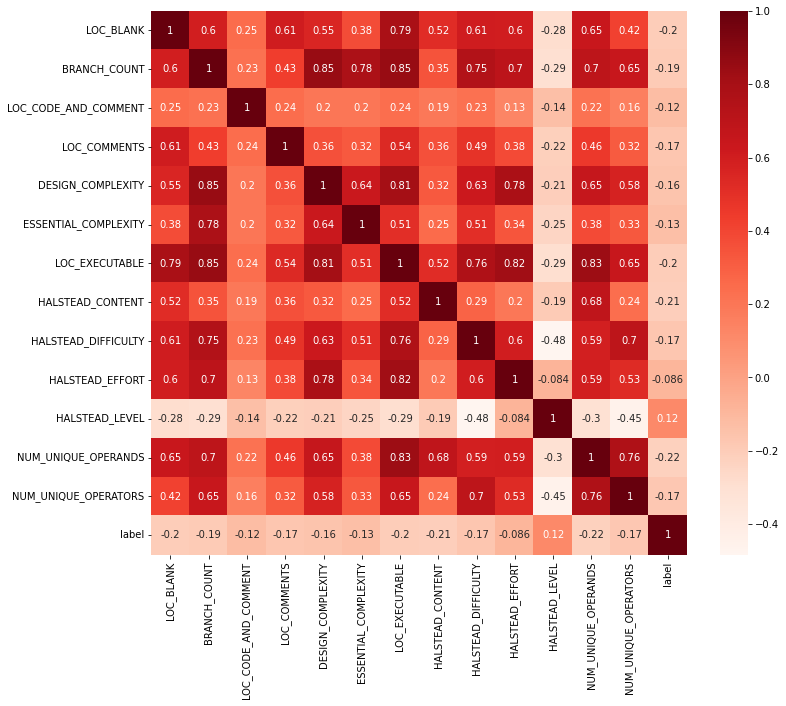

In [46]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
correlationMatrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.cm.Reds)
plt.plot()

##1.KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=89)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(knn)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
knn.fit(X_train_sfs, y_train)
accuracy=knn.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=knn.predict(X_test_sfs)
print("MCC HSf KNN:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.7970021413276231
Selected columns: Index(['LOC_BLANK', 'LOC_CODE_AND_COMMENT', 'LOC_EXECUTABLE',
       'HALSTEAD_EFFORT', 'HALSTEAD_LEVEL', 'NUM_UNIQUE_OPERANDS'],
      dtype='object')
MCC HSf KNN: 0.20354550413571657


##2.NAIVE BAYES

In [49]:
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(gnb)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
gnb.fit(X_train_sfs, y_train)
gnb.score(X_test_sfs, y_test)
accuracy=gnb.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=gnb.predict(X_test_sfs)
print("MCC HSf NB:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.7905781584582441
Selected columns: Index(['LOC_BLANK', 'LOC_COMMENTS', 'HALSTEAD_EFFORT', 'HALSTEAD_LEVEL',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS'],
      dtype='object')
MCC HSf NB: 0.2077343935017212


##3.DECISON TREE CLASSIFIER

In [50]:
dtc = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(dtc)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
dtc.fit(X_train_sfs, y_train)
accuracy=dtc.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=dtc.predict(X_test_sfs)
print("MCC HSf DT:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.7374732334047109
Selected columns: Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY'],
      dtype='object')
MCC HSf DT: 0.1659482279140916


##4.ADA BOOST

In [51]:
ab= AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(ab)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
ab.fit(X_train_sfs, y_train)
accuracy=ab.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=ab.predict(X_test_sfs)
print("MCC HSf AB:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.7905781584582441
Selected columns: Index(['LOC_CODE_AND_COMMENT', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'NUM_UNIQUE_OPERANDS'],
      dtype='object')
MCC HSf AB: 0.1595134392682779


##5.RANDOM FOREST

In [52]:
rf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(rf)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()
rf.fit(X_train_sfs, y_train)
rf.score(X_test_sfs, y_test)
accuracy=rf.score(X_test_sfs, y_test)
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
print("Accuracy:",accuracy)
print("Selected columns:",data_new.columns)
y_pred=rf.predict(X_test_sfs)
print("MCC HSf RF:",matthews_corrcoef(y_pred,y_test))

Accuracy: 0.7661670235546039
Selected columns: Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT',
       'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_DIFFICULTY'],
      dtype='object')
MCC HSf RF: 0.15540316058069342
